In [9]:
import os, numpy as np, pandas as pd
from matplotlib import pyplot as plt

In [10]:
%matplotlib inline

In [11]:
datapath = os.path.join(os.path.pardir, os.path.pardir)
datapath = os.path.join(datapath, 'MEGIdata')
datapath = os.path.join(datapath,'data')
filename = os.path.join(datapath, 'ActMEGI.csv')
filename

'..\\..\\MEGIdata\\data\\ActMEGI.csv'

In [12]:
df = pd.read_csv(filename,quoting=2,quotechar="'",parse_dates=['EnrollDate','CloseDate','AssetDate','BDay'] )

In [13]:
len(df)

63727

In [ ]:
df.head()

In [15]:
df1 = df.drop_duplicates(['Account'])

In [16]:
len(df1)

55594

In [ ]:
df[df.Account == '20X56S34']

In [ ]:
df1[df1['Account'] == '20X56S34']

In [19]:
df1.MSGAcctCount.corr(df1.HHAcctCount)

0.26131297624966526

## Plot below

In [20]:
termd = df1[df1.Status == 'T' ]
actived = df1[df1.Status == 'A' ]

In [21]:
termdf = termd[['EnrollDate','Employee','Account']]
termdfEmp = termdf[(termdf.EnrollDate > '2017-03-01') & (termdf.EnrollDate < '2017-03-31') & (termdf.Employee == 'Y')]
termdfNonEmp = termdf[(termdf.EnrollDate > '2017-03-01') & (termdf.EnrollDate < '2017-03-31') & (termdf.Employee == 'N')]

In [22]:
termdfEmp = termdfEmp.drop(['Employee'],axis=1)
termdfNonEmp = termdfNonEmp.drop(['Employee'],axis=1)
termdfEmpgrp = termdfEmp.groupby(['EnrollDate']).count()
termdfEmpgrp = termdfEmpgrp.rename(columns={'Account' : 'Employee'})
termdfNonEmpgrp = termdfNonEmp.groupby(['EnrollDate']).count()
termdfNonEmpgrp = termdfNonEmpgrp.rename(columns={'Account' : 'NonEmployee'})

In [23]:
termdfEmpgrp.head()

,Employee
EnrollDate,
2017-03-02,6
2017-03-03,7
2017-03-04,7
2017-03-07,5
2017-03-08,3


In [24]:
termdfNonEmpgrp.head()

,NonEmployee
EnrollDate,
2017-03-02,36
2017-03-03,27
2017-03-04,20
2017-03-06,1
2017-03-07,42


In [25]:
acctgrp = termd[['EnrollDate','Account']]
#acctgrp = actived[['EnrollDate','Account']]
acctgrpMar18 = acctgrp[(acctgrp.EnrollDate > '2018-03-01') & (acctgrp.EnrollDate < '2018-03-31')]
acctgrpMar18 = acctgrpMar18.rename(columns={'Account': 'Mar2018'})
acctgrpMar17 = acctgrp[(acctgrp.EnrollDate > '2017-03-01') & (acctgrp.EnrollDate < '2017-03-31')]
acctgrpMar17 = acctgrpMar17.rename(columns={'Account': 'Mar2017'})

In [26]:
datacntMar18 = acctgrpMar18.groupby('EnrollDate').count().reset_index()
datacntMar17 = acctgrpMar17.groupby('EnrollDate').count().reset_index()
datacntMar = pd.concat([datacntMar17, datacntMar18],axis =1)

In [27]:
print(len(datacntMar))
datacntMar.drop(['EnrollDate','EnrollDate'],axis=1,inplace=True)

25


In [28]:
datacntMar.tail()

,Mar2017,Mar2018
20,26,2
21,1,3
22,37,4
23,31,4
24,31,9


In [29]:
print(datacntMar.Mar2017.mean())
print(datacntMar.Mar2017.median())

27.6
31.0


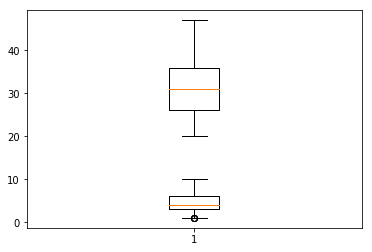

In [30]:
plt.boxplot(datacntMar.Mar2017)
plt.boxplot(datacntMar.Mar2018)
plt.show()

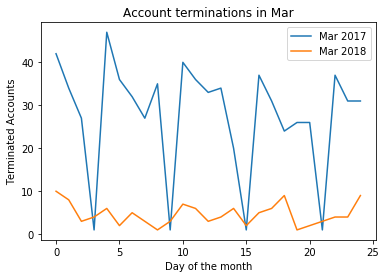

In [31]:
plt.plot(datacntMar.index,datacntMar.Mar2017,datacntMar.Mar2018)
plt.title('Account terminations in Mar')
plt.xlabel('Day of the month')
plt.ylabel('Terminated Accounts')
plt.legend(['Mar 2017','Mar 2018'])
plt.savefig('test.png')
plt.show()

In [32]:
! dir

 Volume in drive C is OSDisk
 Volume Serial Number is BEA5-F054

 Directory of C:\Users\NBKCA82\Documents\Learning\DataVis\notebooks

06/06/2018  09:27 AM    <DIR>          .
06/06/2018  09:27 AM    <DIR>          ..
06/06/2018  09:04 AM    <DIR>          .ipynb_checkpoints
06/06/2018  09:26 AM           181,906 MEGI.ipynb
06/06/2018  09:27 AM            28,190 test.png
               2 File(s)        210,096 bytes
               3 Dir(s)  265,452,040,192 bytes free


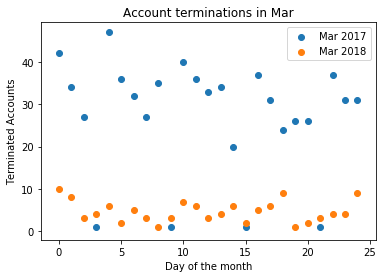

In [33]:
plt.scatter(datacntMar.index,datacntMar.Mar2017)
plt.scatter(datacntMar.index,datacntMar.Mar2018)
plt.title('Account terminations in Mar')
plt.xlabel('Day of the month')
plt.ylabel('Terminated Accounts')
plt.legend(['Mar 2017','Mar 2018'])
plt.show()

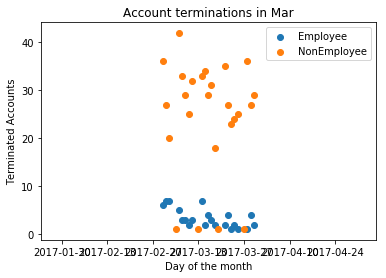

In [34]:
plt.scatter(termdfEmpgrp.index,termdfEmpgrp.Employee)
plt.scatter(termdfNonEmpgrp.index,termdfNonEmpgrp.NonEmployee)
plt.title('Account terminations in Mar')
plt.xlabel('Day of the month')
plt.ylabel('Terminated Accounts')
plt.legend(['Employee','NonEmployee'])
plt.show()

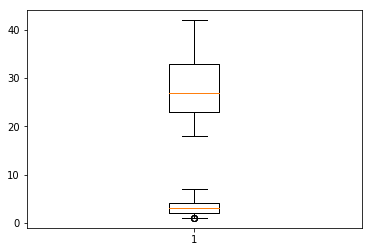

In [35]:
plt.boxplot(termdfEmpgrp.Employee)
plt.boxplot(termdfNonEmpgrp.NonEmployee)
plt.show()

In [36]:
set(termd.Strategy)

{'28S01725',
 '28S01729',
 '28S01730',
 '28S01731',
 '28S01732',
 '28S01733',
 '28S01734',
 '28S01735',
 '28S01736',
 '28S01737'}

In [37]:
dfstr = termd[['Account']].groupby(termd.Strategy).count()
dfstr

,Account
Strategy,
28S01725,1948
28S01729,42
28S01730,753
28S01731,5
28S01732,809
28S01733,172
28S01734,542
28S01735,300
28S01736,384


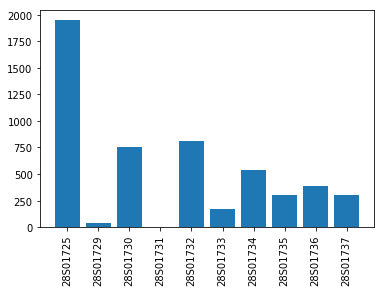

In [38]:
x = range(10)
plt.bar(x, dfstr.Account)
plt.xticks(x, dfstr.index, rotation='vertical')
plt.show()

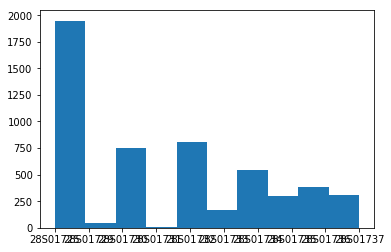

In [39]:
plt.hist(termd.Strategy);

In [40]:
dflifemean = termd[['LifeofAcct']].groupby(termd.Strategy).mean()
dflifemedian = termd[['LifeofAcct']].groupby(termd.Strategy).median()
dflife25 = termd[['LifeofAcct']].groupby(termd.Strategy).quantile(0.25)
dflife75 = termd[['LifeofAcct']].groupby(termd.Strategy).quantile(0.75)

In [41]:
dfstr.tail()

,Account
Strategy,
28S01733,172
28S01734,542
28S01735,300
28S01736,384
28S01737,306


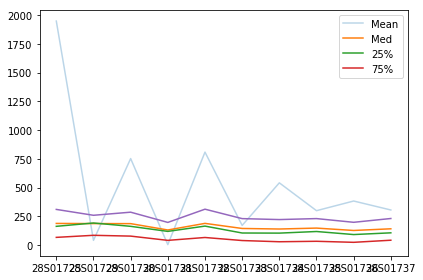

In [42]:
plt.plot(dfstr, alpha=0.3)
plt.plot(dflifemean)
plt.plot(dflifemedian)
plt.plot(dflife25)
plt.plot(dflife75)
plt.legend(['Mean','Med','25%','75%'])
plt.tight_layout()
plt.show()

In [43]:
termdsample = termd.sample(frac=0.1)
print(str(termdsample.shape) + '/' + str(termd.shape))

(526, 16)/(5261, 16)


In [44]:
print(termdsample['LifeofAcct'].mean(), termd['LifeofAcct'].mean())

162.75475285171103 173.031743014636


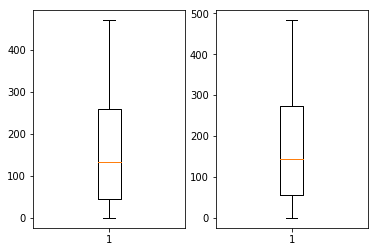

In [45]:
plt.subplot(121)
plt.boxplot(termdsample['LifeofAcct'])
plt.subplot(122)
plt.boxplot(termd['LifeofAcct'])
plt.show()

In [46]:
print(f'{termd.HAssets.mean():0.0f}')

123318


In [47]:
print(f'{termd.HAssets.median():0.0f}')

33750


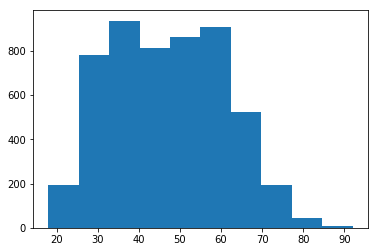

In [48]:
plt.hist(termd.AgeAtAO);

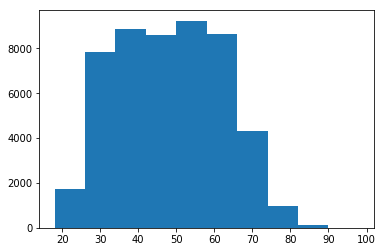

In [49]:
plt.hist(actived.AgeAtAO);

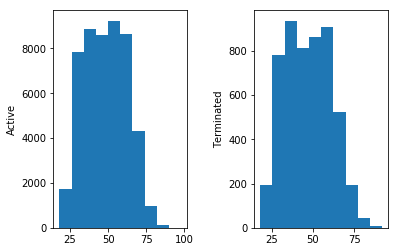

In [50]:
plt.subplot(1,2,1)
plt.hist(actived.AgeAtAO)
plt.ylabel('Active')
plt.subplot(1,2,2)
plt.hist(termd.AgeAtAO)
plt.ylabel('Terminated')
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.3)
plt.show()

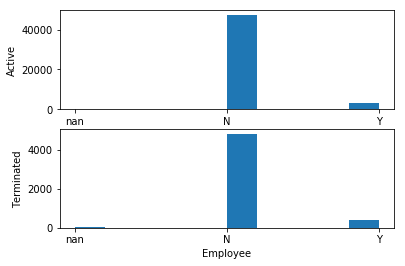

In [51]:
plt.subplot(2,1,1)
plt.hist(actived.Employee)
plt.ylabel('Active')
plt.subplot(2,1,2)
plt.hist(termd.Employee)
plt.ylabel('Terminated')
plt.xlabel('Employee')
plt.show()